# Sentiment Analysis of Amazon Reviews on Women Dresses

## Step 1: Import packages and read in data

In [37]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [2]:
# read in data
df = pd.read_csv('.\data\Women Dresses Reviews Dataset .csv')

In [6]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## Exploratory Data Analysis

In [4]:
df.shape

(22641, 11)

In [8]:
# drop rows that don't have review
df = df.dropna(subset = ['review_text'])

In [9]:
df['review_text'].values[0]

'Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price. these jeans are fresh!'

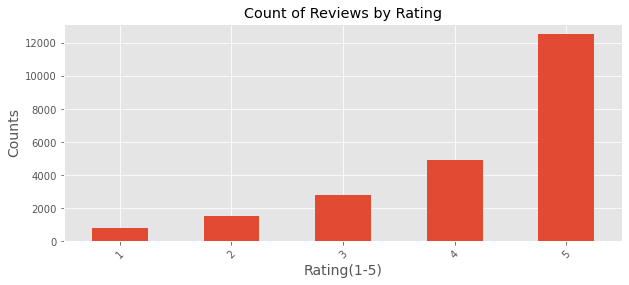

In [11]:
# look at the distribution of the reviews
ax = df['rating'].value_counts().sort_index() \
    .plot(kind = 'bar',
         title = 'Count of Reviews by Rating',
         figsize = (10, 4))
ax.set_xlabel('Rating(1-5)', fontsize = 14)
ax.set_ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

### Getting the number of words by splitting them by a space

In [14]:
words_per_review = df.review_text.apply(lambda x: len(str(x).split(" ")))

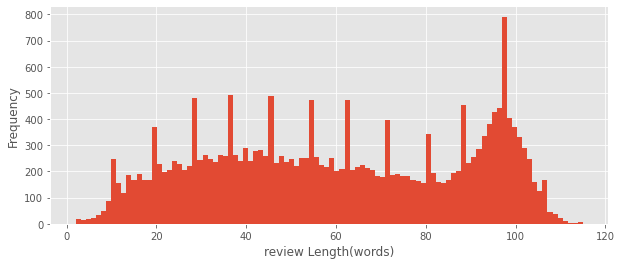

In [15]:
words_per_review.hist(bins= 100, figsize = (10, 4))
plt.xlabel('review Length(words)')
plt.ylabel('Frequency')
plt.show()

In [16]:
# average review length and skewness
print("Aerage words", words_per_review.mean())
print('Skewness:', words_per_review.skew())

Aerage words 60.214875668035866
Skewness: -0.024491744174783125


### Text visualization using word clouds

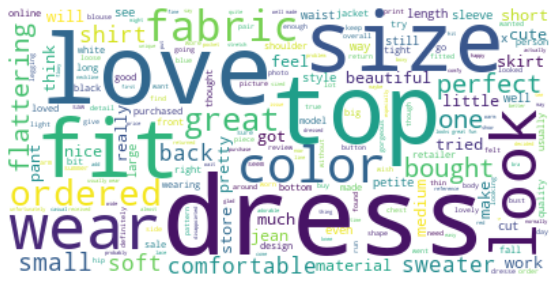

In [76]:
word_cloud_text = ''.join(df['review_text'])
wordcloud = WordCloud(max_font_size = 80,max_words = 200, \
                      background_color = 'white').generate(word_cloud_text)
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud, interpolation = "bilinear")

plt.axis("off")
plt.show()

## Basic NLTK

In [47]:
# take a close look at one of review(the 10th review)
example = df['review_text'][10]
print(example)

I have been searching around for new and unique clothes to wear to work. this top is cute, comfortable, and well made. these are all qualities that i look for when purchasing clothes. also the shirt is flattering for the stomach if you are like me and had a baby.


In [48]:
# tokenize the review sentence
nltk.word_tokenize(example)

['I',
 'have',
 'been',
 'searching',
 'around',
 'for',
 'new',
 'and',
 'unique',
 'clothes',
 'to',
 'wear',
 'to',
 'work',
 '.',
 'this',
 'top',
 'is',
 'cute',
 ',',
 'comfortable',
 ',',
 'and',
 'well',
 'made',
 '.',
 'these',
 'are',
 'all',
 'qualities',
 'that',
 'i',
 'look',
 'for',
 'when',
 'purchasing',
 'clothes',
 '.',
 'also',
 'the',
 'shirt',
 'is',
 'flattering',
 'for',
 'the',
 'stomach',
 'if',
 'you',
 'are',
 'like',
 'me',
 'and',
 'had',
 'a',
 'baby',
 '.']

In [50]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'have',
 'been',
 'searching',
 'around',
 'for',
 'new',
 'and',
 'unique',
 'clothes']

In [51]:
# part of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('searching', 'VBG'),
 ('around', 'RB'),
 ('for', 'IN'),
 ('new', 'JJ'),
 ('and', 'CC'),
 ('unique', 'JJ'),
 ('clothes', 'NNS')]

In [52]:
# chunk the given list of tagged tokens into one sentence.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  been/VBN
  searching/VBG
  around/RB
  for/IN
  new/JJ
  and/CC
  unique/JJ
  clothes/NNS
  to/TO
  wear/VB
  to/TO
  work/VB
  ./.
  this/DT
  top/JJ
  is/VBZ
  cute/JJ
  ,/,
  comfortable/JJ
  ,/,
  and/CC
  well/RB
  made/VBN
  ./.
  these/DT
  are/VBP
  all/DT
  qualities/NNS
  that/IN
  i/JJ
  look/VBP
  for/IN
  when/WRB
  purchasing/NN
  clothes/NNS
  ./.
  also/RB
  the/DT
  shirt/NN
  is/VBZ
  flattering/VBG
  for/IN
  the/DT
  stomach/NN
  if/IN
  you/PRP
  are/VBP
  like/IN
  me/PRP
  and/CC
  had/VBD
  a/DT
  baby/NN
  ./.)


## Step 2: VADER Sentiment Scoring

In [53]:
# get VADER polarity score on the example review
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9217}

In [54]:
# run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['review_text']
    myid = row['s.no']
    res[myid] = sia.polarity_scores(str(text))

  0%|          | 0/22641 [00:00<?, ?it/s]

In [55]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 's.no'})
vaders = vaders.merge(df, how = 'left')

In [56]:
vaders.head()

,s.no,neg,neu,pos,compound,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,0.047,0.747,0.206,0.7804,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,0.051,0.790,0.160,0.8803,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,0.000,0.917,0.083,0.4389,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,0.025,0.640,0.335,0.9914,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,0.039,0.895,0.066,0.3174,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## Plot VADER results

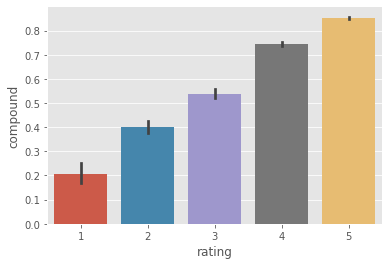

In [58]:
# plot the count number of each amazon review rating star
sns.barplot(data = vaders, x = "rating", y = 'compound')
ax.set_title('Compound Rating by Amazon Star Review')
plt.show()

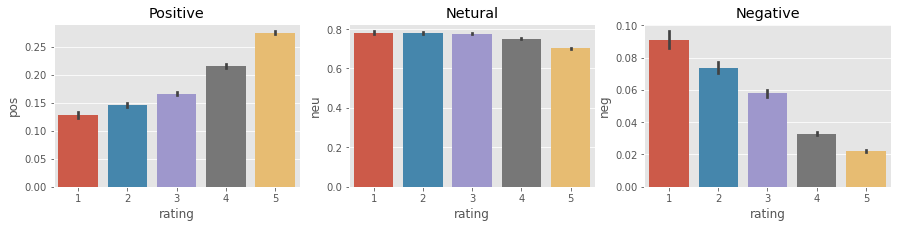

In [59]:
# plot rating vs scores of positive, neutral, and negative
fig, axs = plt.subplots(1, 3, figsize = (15, 3))
sns.barplot(data = vaders, x = 'rating', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'rating', y = 'neg', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Netural')
axs[2].set_title('Negative')

plt.show()

## Step 3: Roberta Pretrained Model

In [60]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
# use Huggingface pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [63]:
# run Roberta model on the example review
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {'roberta_neg': scores[0],
               'roberta_neu': scores[1],
               'roberta_pos': scores[2]
              }
print(scores_dict)

{'roberta_neg': 0.0016043347, 'roberta_neu': 0.030035984, 'roberta_pos': 0.9683597}


In [64]:
# run Roberta model on entire dataset

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg': scores[0],
                   'roberta_neu': scores[1],
                    'roberta_pos': scores[2]
                  }
    return scores_dict


In [65]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['review_text']
        myid = row['s.no']
        vader_result = sia.polarity_scores(str(text))
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]= value
        roberta_result = polarity_scores_roberta(str(text))
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id{myid}')
    

  0%|          | 0/22641 [00:00<?, ?it/s]

In [66]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 's.no'})
results_df = results_df.merge(df, how = 'left')

In [38]:
results_df.head()

,s.no,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,0.047,0.747,0.206,0.7804,0.008643,0.048363,0.942994,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,0.051,0.790,0.160,0.8803,0.008615,0.080899,0.910486,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,0.000,0.917,0.083,0.4389,0.227611,0.380143,0.392245,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,0.025,0.640,0.335,0.9914,0.002893,0.009174,0.987933,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,0.039,0.895,0.066,0.3174,0.148811,0.248008,0.603181,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## Step 4: Compare scores between models

In [68]:
results_df.columns

Index(['s.no', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'age', 'division_name',
       'department_name', 'class_name', 'clothing_id', 'title', 'review_text',
       'alike_feedback_count', 'rating', 'recommend_index '],
      dtype='object')

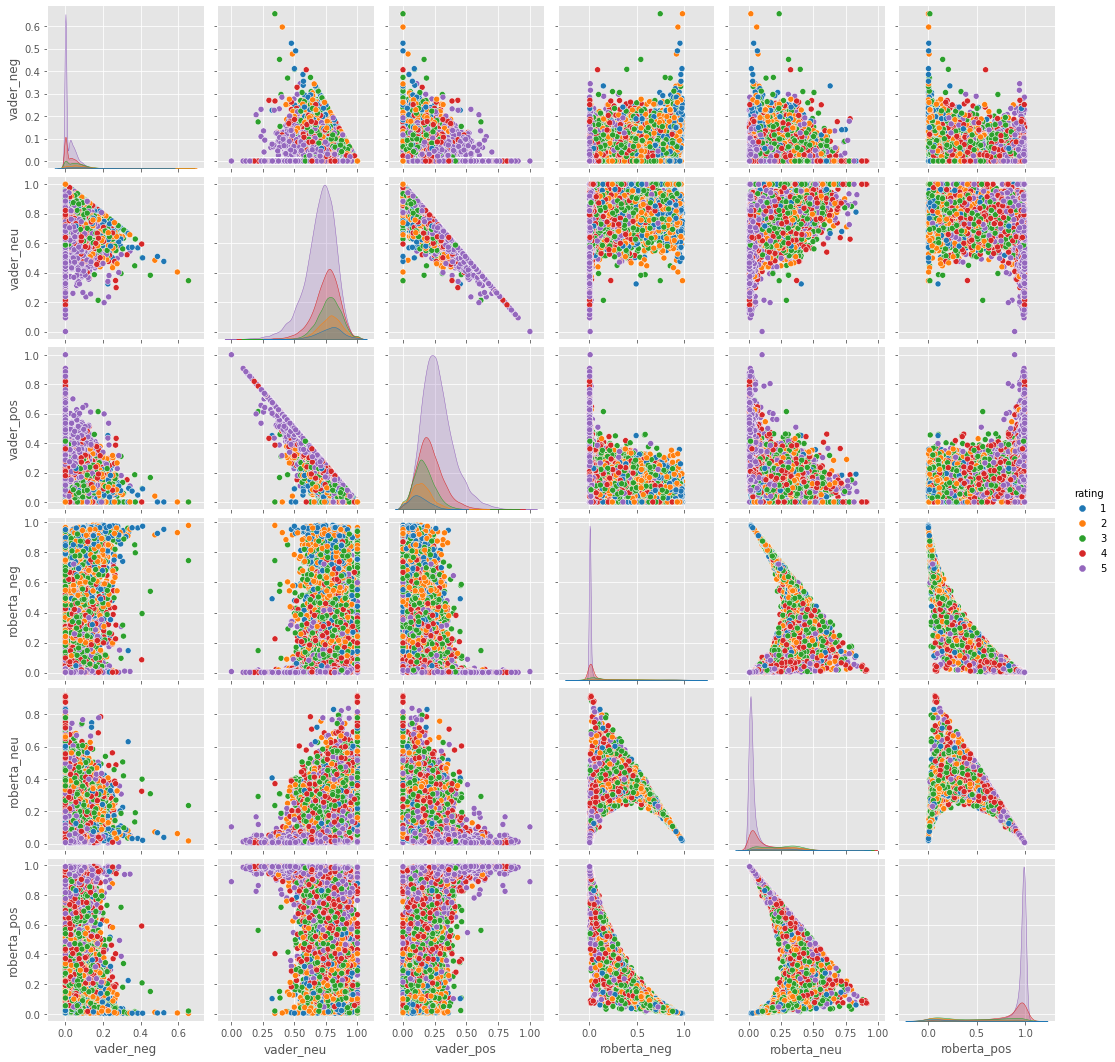

In [69]:
sns.pairplot(data = results_df,
            vars = ['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'rating',
            palette = 'tab10')

## Step 5: Review Examples

### positive sentiment vs. 1-Star amazon review

In [70]:
# positive roberta sentiment vs 1-star amazon review
results_df.query('rating == 1')\
                .sort_values('roberta_pos', ascending = False)['review_text'].values[0]

'I saw this dress in the catalog and had to have it. when i went to the store it was sold out so i had them order and ship it to me in two sizes - my regular and one size larger. when i got them, i tried on my regular size first and it was just perfect! beautiful pattern and material. light and airy. sexy with the low-cut "keyhole." i am sooo happy with my purchase.'

In [71]:
# positive vader sentiment vs 1-star amazon review
results_df.query('rating == 1')\
                .sort_values('vader_pos', ascending = False)['review_text'].values[0]

'Super itchy! had to return.'

### negative sentiment vs. 5-Star amazon review

In [72]:
# negative roberta sentiment vs 5-star amazon review
results_df.query('rating == 5')\
                .sort_values('roberta_neg', ascending = False)['review_text'].values[0]

"This is a review of customer service in general,from several issues with online shopping! i don't understand why you ask for my opinion and say it counts when clearly it does not.i have had a lot of issues. receiving parcels from one of your carriers,laser ship and i have reported the issues to them and retailer,but it appears only the good parts are read.this poor service cost me money in postage and lost discounts but again i'm ignored,and i had to order my last returned parcel again pay more fo"

In [73]:
# negative vader sentiment vs 5-star amazon review
results_df.query('rating == 5')\
                .sort_values('vader_neg', ascending = False)['review_text'].values[0]

"Love the collar, cut is cropped but i'm wearing a tank under for hole coverage anyways. no complaints!"

# The End